**This Kernel is an iplementation of CNN Architectures using VGG16 and VGG19 CNN architectures**

The Kernel Architeture is described as:
<img src="https://qphs.fs.quoracdn.net/main-qimg-83c7dee9e8b039c3ca27c8dd91cacbb4" width="900px">


**Important Features of VGG16 architectures**

**Last Layer should have 1000 FC**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['fruits', 'vgg19', 'dogs-vs-cats-redux-kernels-edition', 'flowers-recognition', 'vgg16']


**I have used Python's Keras library to implement the model. The following code shows the implementation of the Model**

**There are two ways to build Keras models: sequential and functional. **

The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

Alternatively, the functional API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. In fact, you can connect layers to (literally) any other layer. As a result, creating complex networks such as siamese networks and residual networks become possible.


In [2]:
# Imports
from keras.layers import Input, Conv2D, MaxPool2D
from keras.layers import Dense, Flatten
from keras.models import Model

# Define the input
#   Unlike the Sequential model, you must create and define 
#   a standalone "Input" layer that specifies the shape of input 
#   data. The input layer takes a "shape" argument, which is a 
#   tuple that indicates the dimensionality of the input data.
#   When input data is one-dimensional, such as the MLP, the shape 
#   must explicitly leave room for the shape of the mini-batch size 
#   used when splitting the data when training the network. Hence, 
#   the shape tuple is always defined with a hanging last dimension.

_input = Input((224,224,1))

conv1 = Conv2D(filters=64, kernel_size=(3,3), padding = "same", activation="relu")(_input)
conv2 = Conv2D(filters=64, kernel_size=(3,3), padding = "same", activation="relu")(conv1)
pool1 = MaxPool2D((2,2))(conv2)


conv3 = Conv2D(filters=128, kernel_size=(3,3), padding = "same", activation="relu")(pool1)
conv4 = Conv2D(filters=128, kernel_size=(3,3), padding = "same", activation="relu")(conv3)
pool2 = MaxPool2D((2,2))(conv4)


conv5 = Conv2D(filters=256, kernel_size=(3,3), padding = "same", activation="relu")(pool2)
conv6 = Conv2D(filters=256, kernel_size=(3,3), padding = "same", activation="relu")(conv5)
conv7 = Conv2D(filters=256, kernel_size=(3,3), padding = "same", activation="relu")(conv6)
pool3 = MaxPool2D((2,2))(conv7)


conv8 = Conv2D(filters=512, kernel_size=(3,3), padding = "same", activation="relu")(pool3)
conv9 = Conv2D(filters=512, kernel_size=(3,3), padding = "same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding = "same", activation="relu")(conv9)
pool4 = MaxPool2D((2,2))(conv10)


conv11 = Conv2D(filters=512, kernel_size=(3,3), padding = "same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding = "same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding = "same", activation="relu")(conv12)
pool5 = MaxPool2D((2,2))(conv13)

flat = Flatten()(pool5)


dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

vgg16_model = Model(inputs = _input, outputs= output)



**Using Pretrained Model of VGG16**

Keras Library provides VGG16 pretrained model so that one can save time and use them for different usages:
1. Transfer Learning
2. Features extraction from Images
3. Object Detection

We can add weights to respective layers after loading the model


**What is a Pre-trained Model?**

A pre-trained model has been previously trained on a dataset and contains the weights and biases that represent the features of whichever dataset it was trained on. Learned features are often transferable to different data. For example, a model trained on a large dataset of bird images will contain learned features like edges or horizontal lines that you would be transferable your dataset.

**Why use a Pre-trained Model?**

Pre-trained models are beneficial to us for many reasons. By using a pre-trained model you are saving time. Someone else has already spent the time and compute resources to learn a lot of features and your model will likely benefit from it.

Keras works with batches of images. So, the first dimension is used for the number of samples (or images) you have.

When you load a single image, you get the shape of one image, which is (size1,size2,channels).

In order to create a batch of images, you need an additional dimension: (samples, size1,size2,channels)

The preprocess_input function is meant to adequate your image to the format the model requires.

Some models use images with values ranging from 0 to 1. Others from -1 to +1. Others use the "caffe" style, that is not normalized, but is centered.

You don't need to worry about the internal details of preprocess_input. But ideally, you should load images with the keras functions for that (so you guarantee that the images you load are compatible with preprocess_input).



In [3]:
from keras.applications.vgg16 import decode_predictions, preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns


# loadingImages
catImage1 = "../input/dogs-vs-cats-redux-kernels-edition/train/cat.10032.jpg"
dogImage1 = "../input/dogs-vs-cats-redux-kernels-edition/train/dog.10042.jpg"
flowerImage1 = "../input/flowers-recognition/flowers/flowers/rose/16078501836_3ac067e18a.jpg"
fruit1 = "../input/fruits/fruits-360_dataset/fruits-360/Training/Mango/49_100.jpg"

images = [catImage1, dogImage1, flowerImage1, fruit1]

def loadImage(path):
    # changing dimensions to (224,224)     
    img = image.load_img(path, target_size=(224,224))
    # converting image to array
    img = image.img_to_array(img)
    # Expand the shape of an array.
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img



def getPredictions(model):
    f,ax = plt.subplots(1,4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(images[i]).resize((200,200), Image.ANTIALIAS))
    plt.show()
    
    f,axes = plt.subplots(1,4)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(images):
        img = loadImage(img_path)
        preds = decode_predictions(model.predict(img), top=3)[0]
        b = sns.barplot(y = [c[1] for c in preds], x = [c[2] for c in preds], color="gray", ax= axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()


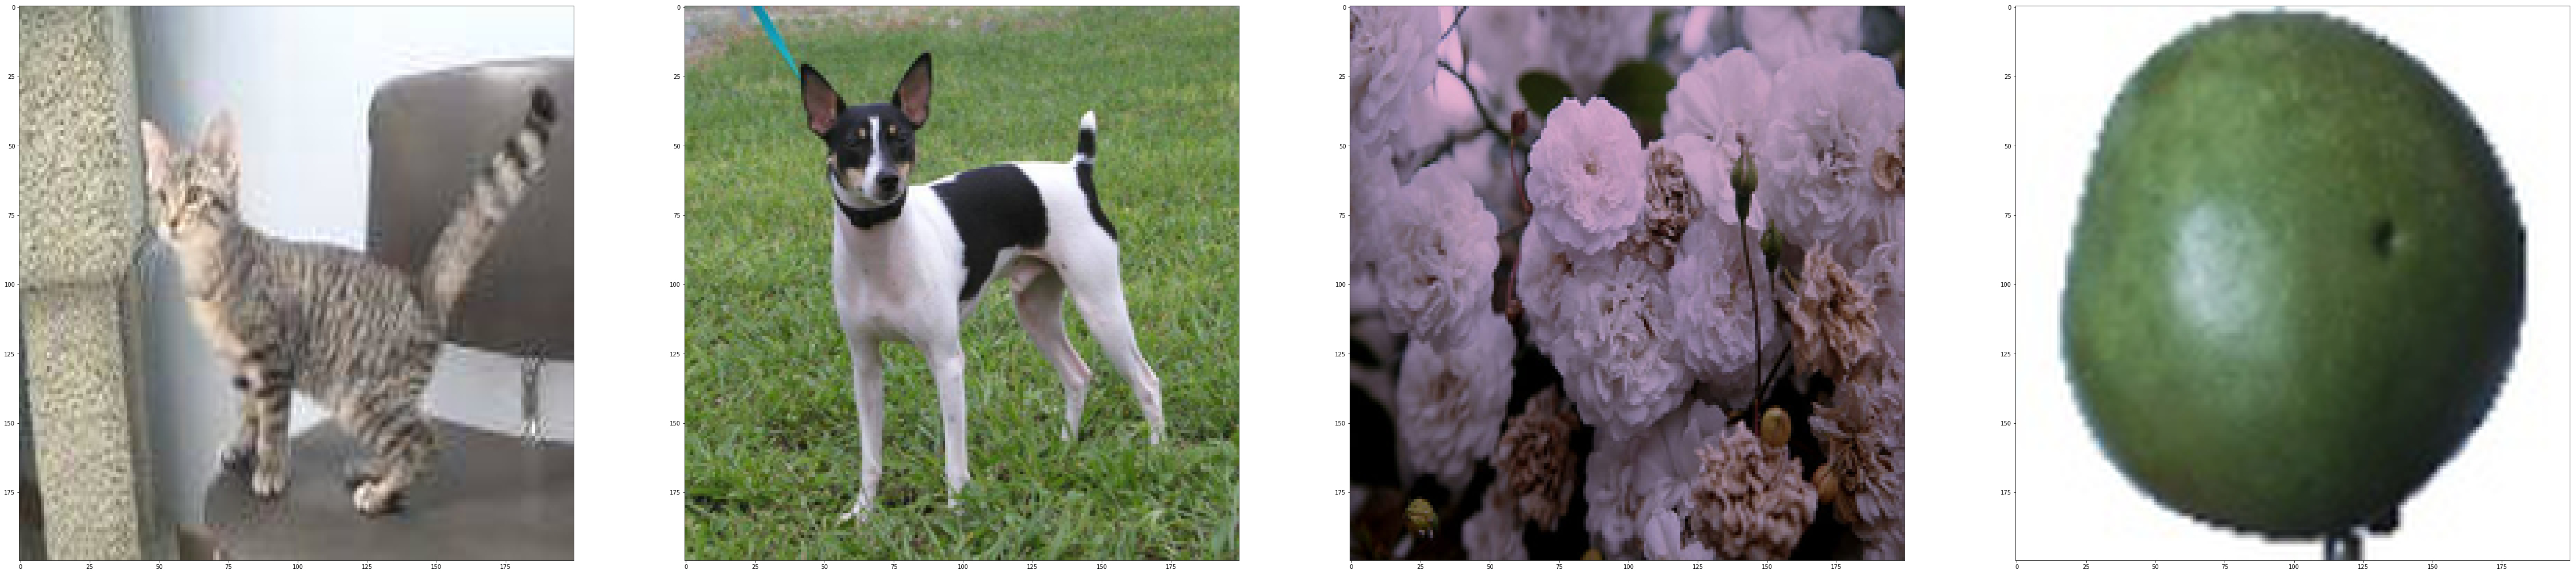

40960/35363 [==================================] - 0s 0us/step


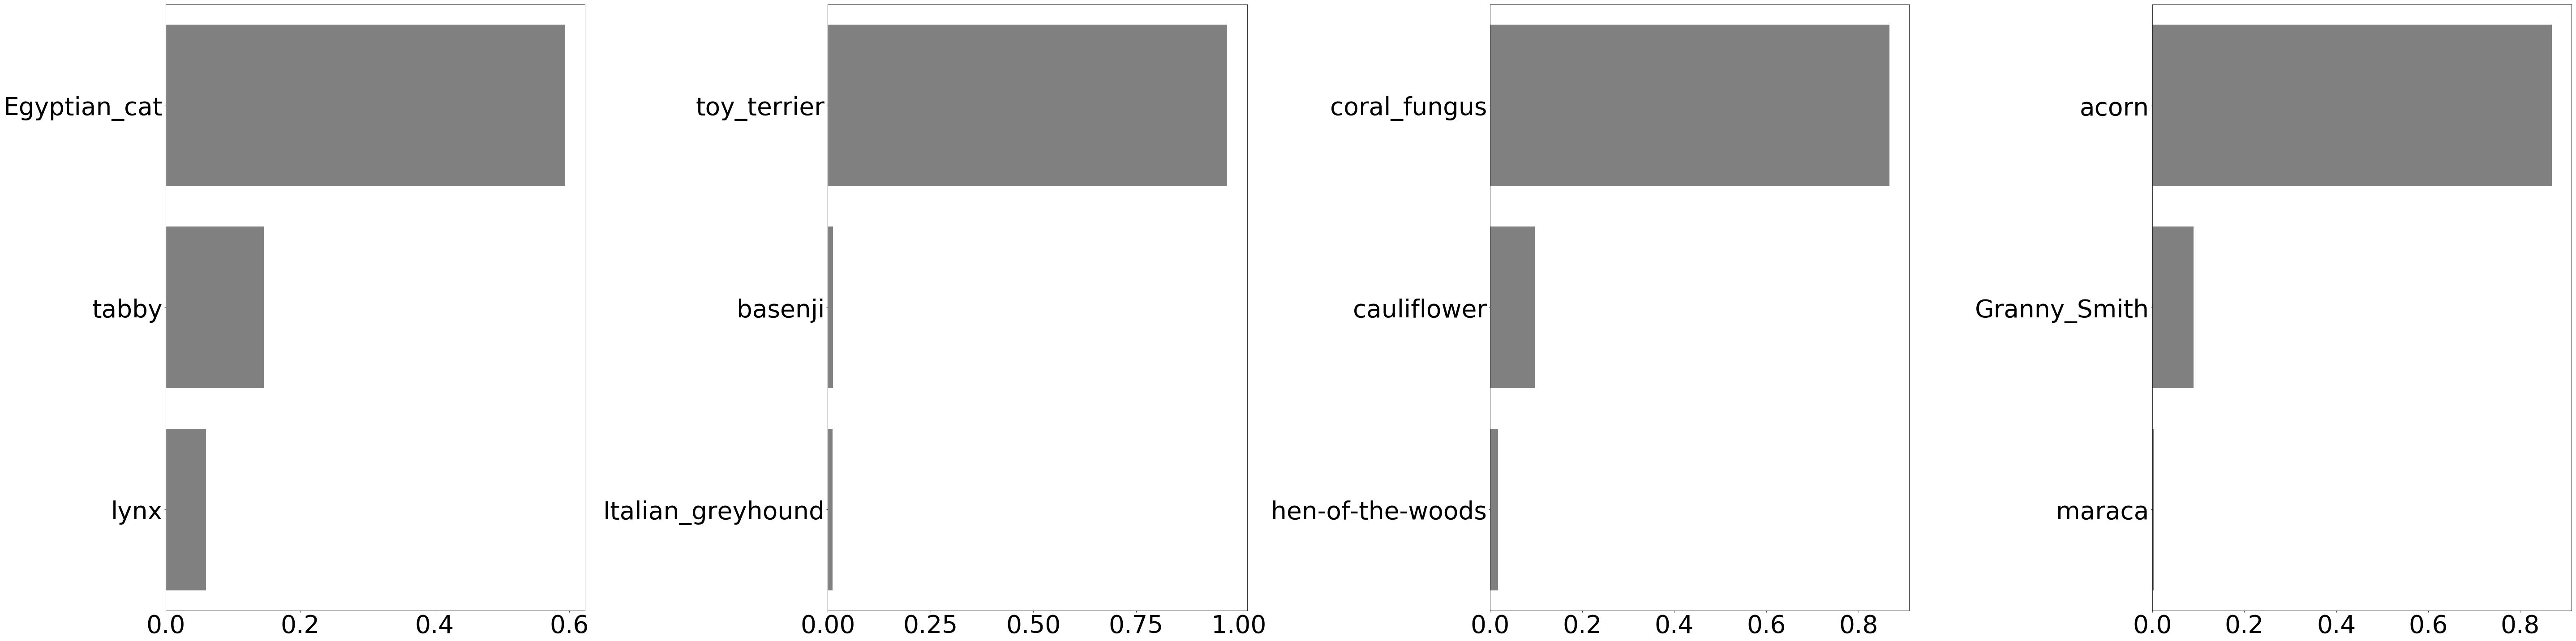

In [4]:
from keras.applications.vgg16 import VGG16
vgg16_weights = '../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
vgg16_model = VGG16(weights=vgg16_weights)
getPredictions(vgg16_model)

**VGG19**

![](https://cdn-images-1.medium.com/max/1600/1*cufAO77aeSWdShs3ba5ndg.jpeg)


VGG19 is a similar model architecure as VGG16 with three additional convolutional layers, it consists of a total of 16 Convolution layers and 3 dense layers also stride 1.

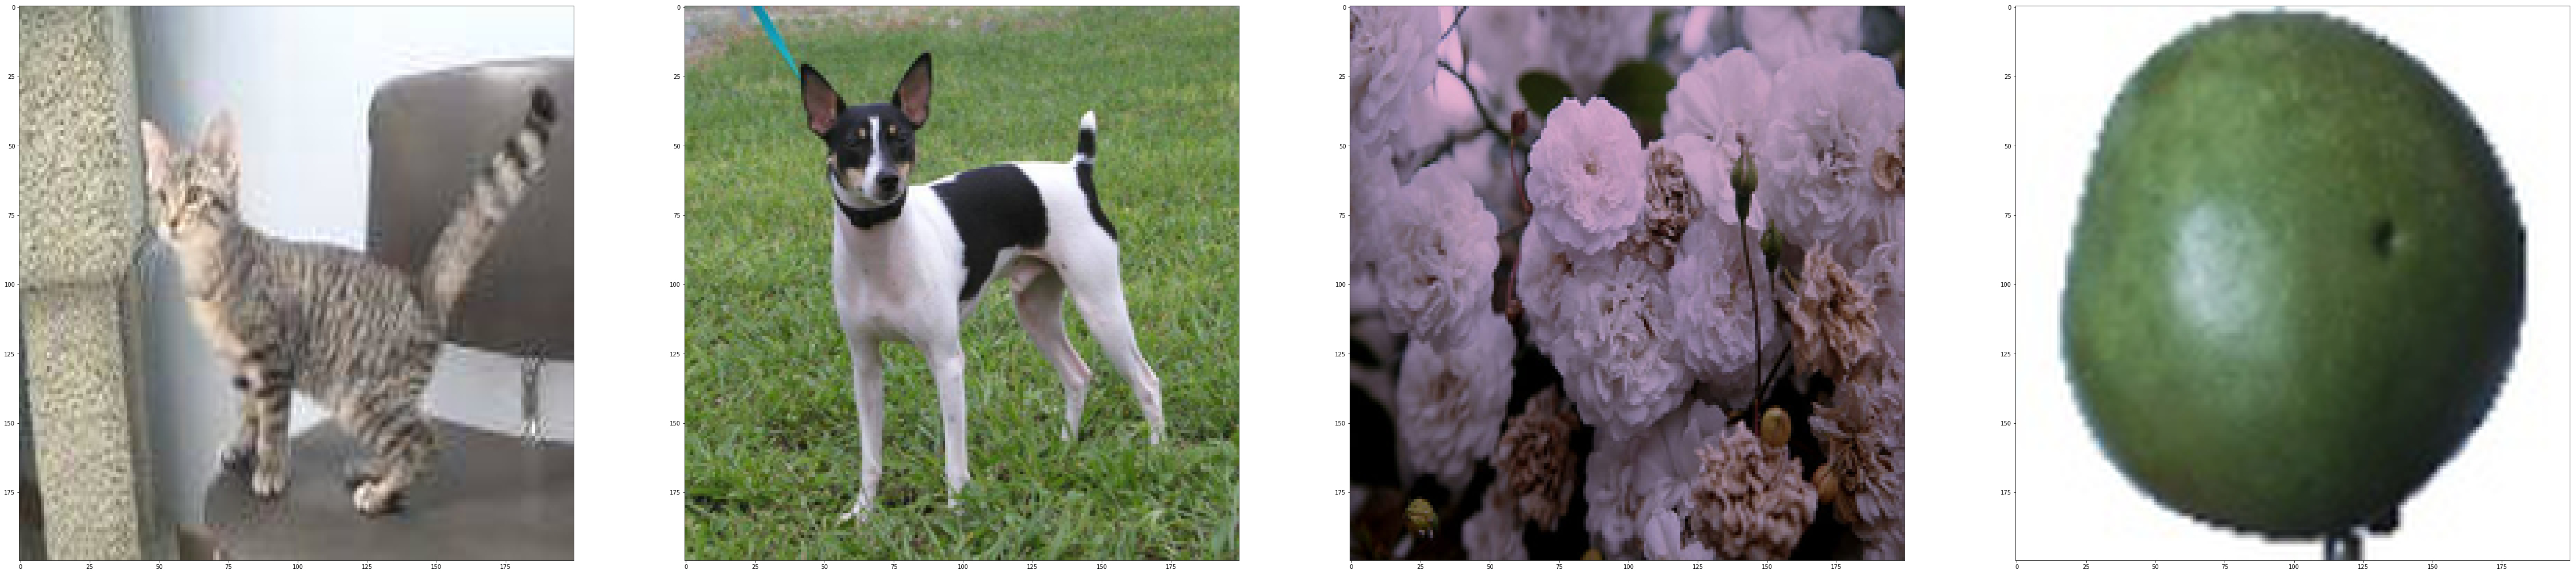

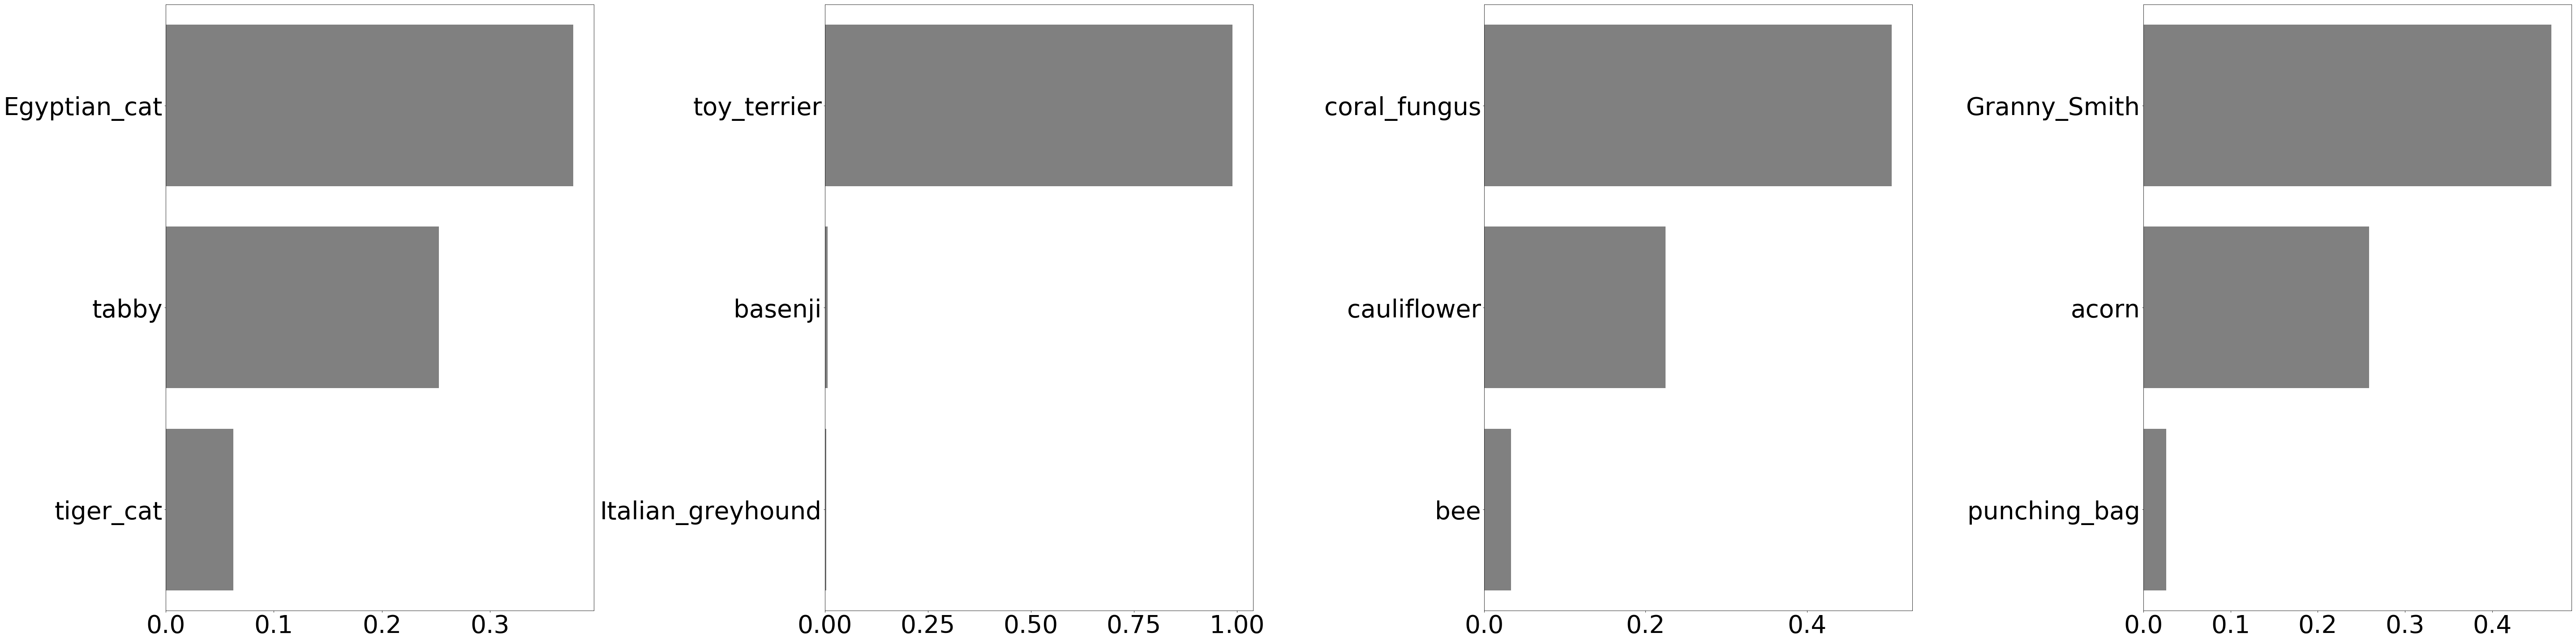

In [5]:
from keras.applications import VGG19
vgg19_weights = '../input/vgg19/vgg19_weights_tf_dim_ordering_tf_kernels.h5'
vgg19_model = VGG19(weights = vgg19_weights)
getPredictions(vgg19_model)